In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [161]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [162]:
cd drive/MyDrive/'DeepLearning MTech'/'Deep Learning'/'Hackathon TSF'

[Errno 2] No such file or directory: 'drive/MyDrive/DeepLearning MTech/Deep Learning/Hackathon TSF'
/content/drive/MyDrive/DeepLearning MTech/Deep Learning/Hackathon TSF


In [163]:
train = pd.read_csv("train.csv")

In [164]:
test = pd.read_csv("test.csv")

In [165]:
train.head(5)

,Month,Avg_sunspot_count
0,01-01-1749,97
1,02-01-1749,104
2,03-01-1749,117
3,04-01-1749,93
4,05-01-1749,142


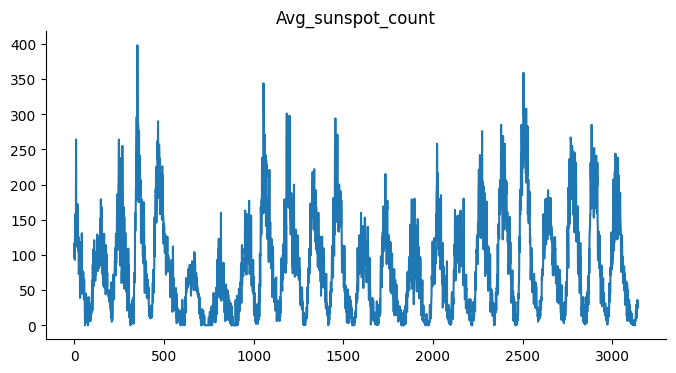

In [166]:
# @title Avg_sunspot_count

from matplotlib import pyplot as plt
train['Avg_sunspot_count'].plot(kind='line', figsize=(8, 4), title='Avg_sunspot_count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [167]:
test.head(5)

,Month
0,01-01-2011
1,02-01-2011
2,03-01-2011
3,04-01-2011
4,05-01-2011


In [168]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              3144 non-null   object
 1   Avg_sunspot_count  3144 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 49.2+ KB


In [169]:
train['Month'] = pd.to_datetime(train['Month'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Month              3144 non-null   datetime64[ns]
 1   Avg_sunspot_count  3144 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 49.2 KB


In [170]:
train.set_index(train['Month'], inplace=True)
train.drop(columns=['Month'], axis = 1, inplace = True)

In [171]:
train.head()

,Avg_sunspot_count
Month,
1749-01-01,97
1749-02-01,104
1749-03-01,117
1749-04-01,93
1749-05-01,142


In [172]:
test['Month'] = pd.to_datetime(test['Month'], dayfirst = True, yearfirst=False)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   120 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.1 KB


In [174]:
train.isnull().sum()

Avg_sunspot_count    0
dtype: int64

In [175]:
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print('Series is non-stationary')
    else:
        print('Series is stationary')

adf_test(train['Avg_sunspot_count'])

ADF Statistic: -10.390308589912832
p-value: 2.0290768019122996e-18
Series is stationary


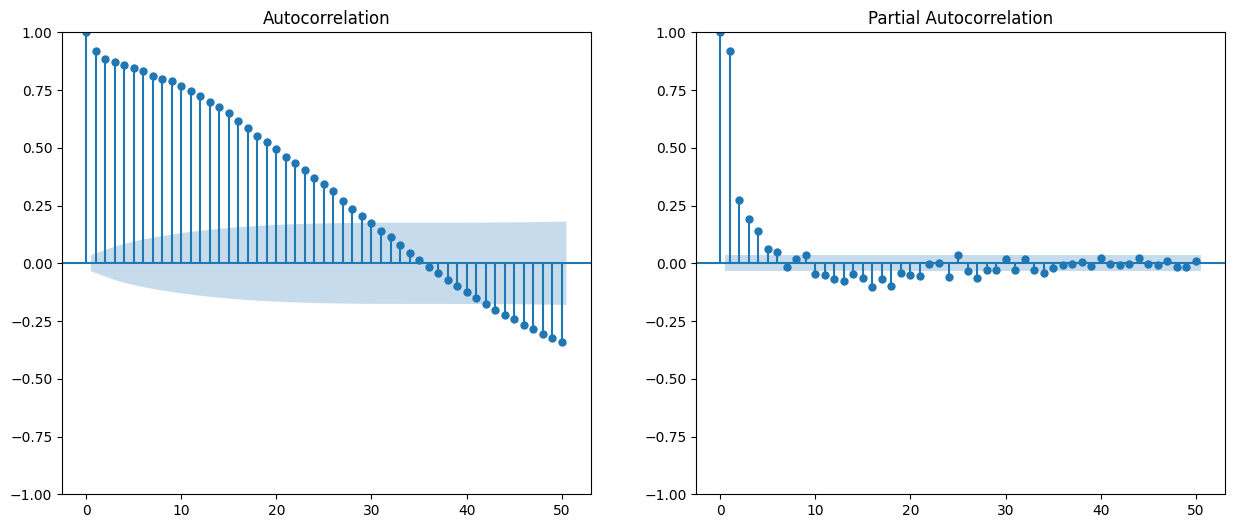

In [176]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

plot_acf(train['Avg_sunspot_count'], lags=50, ax=axes[0])
plot_pacf(train['Avg_sunspot_count'], lags=50, ax=axes[1])

plt.show()

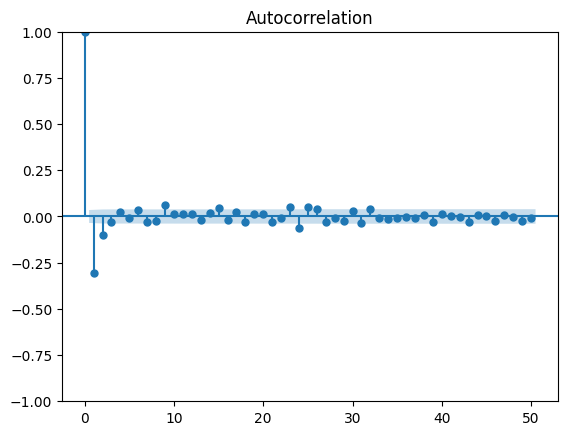

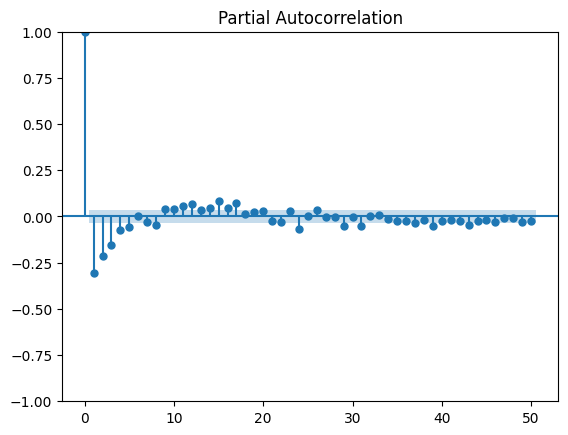

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


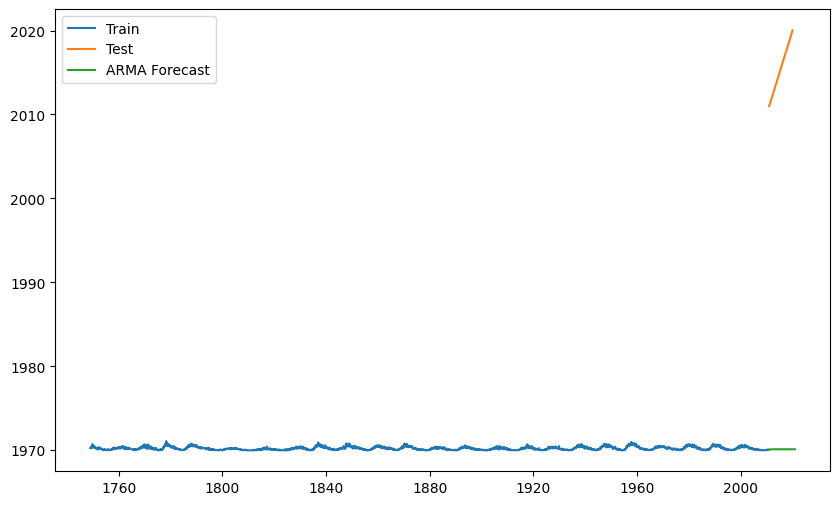

In [177]:
# ARMA (only applicable for stationary data)
# Differencing if necessary (d=1 assumed from stationarity test)
train_diff = train['Avg_sunspot_count'].diff().dropna()

# Determine p and q using ACF and PACF
plot_acf(train_diff, lags=50)
plot_pacf(train_diff, lags=50)
plt.show()

# Assuming p=3, q=3 from plots
model_arma = ARIMA(train['Avg_sunspot_count'], order=(3, 1, 3))
fit_arma = model_arma.fit()
forecast_arma = fit_arma.forecast(steps=len(test))

plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_arma, label='ARMA Forecast')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


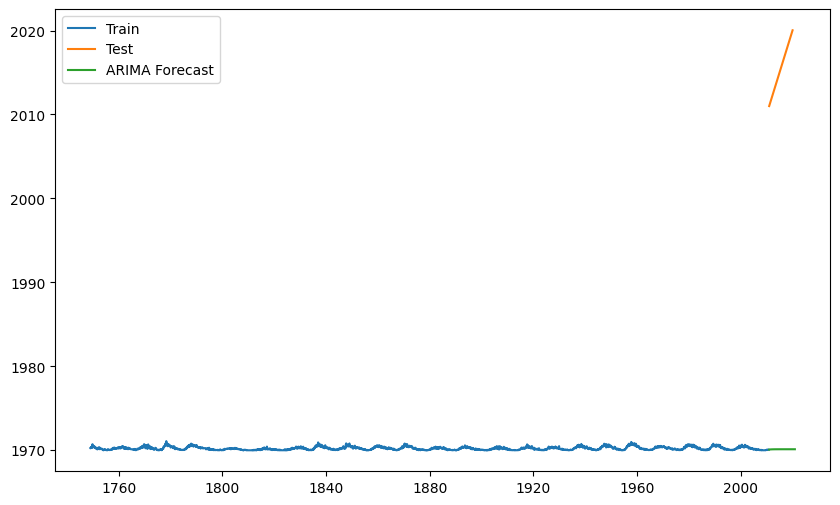

In [178]:
# ARIMA
# Determine p, d, q using ACF, PACF and stationarity test results
model_arima = ARIMA(train['Avg_sunspot_count'], order=(3, 1, 3))
fit_arima = model_arima.fit()
forecast_arima = fit_arima.forecast(steps=len(test))

plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


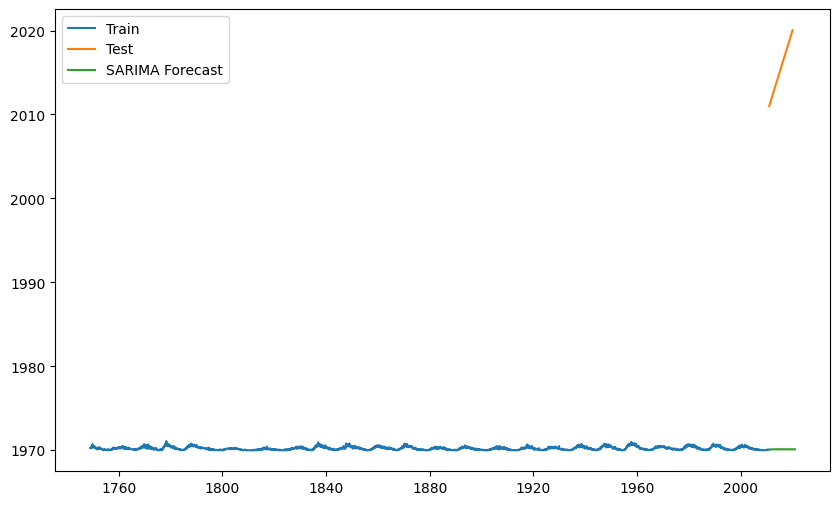

In [179]:
# SARIMA
# Determine p, d, q, P, D, Q, s using ACF, PACF and seasonal analysis
model_sarima = SARIMAX(train['Avg_sunspot_count'], order=(3, 1, 3), seasonal_order=(1, 1, 1, 12))
fit_sarima = model_sarima.fit()
forecast_sarima = fit_sarima.forecast(steps=len(test))

plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.show()


In [180]:
!pip install pmdarima

In [181]:
from pmdarima import auto_arima
auto_arima(train,start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=29325.949, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=38340.130, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=29777.294, Time=0.28 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=35246.882, Time=0.57 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=29284.002, Time=1.95 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=29499.854, Time=0.56 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=29279.368, Time=3.99 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=29366.384, Time=1.19 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=29277.261, Time=5.43 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.78 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=29279.209, Time=5.46 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=29279.242, Time=5.04 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=29183.625, Time=8.98 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=29281.537, Time=4.17 sec
 ARIMA(3,0,3)(0,0,0)[0]  

ARIMA(maxiter=1000, order=(3, 0, 2), scoring_args={}, suppress_warnings=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


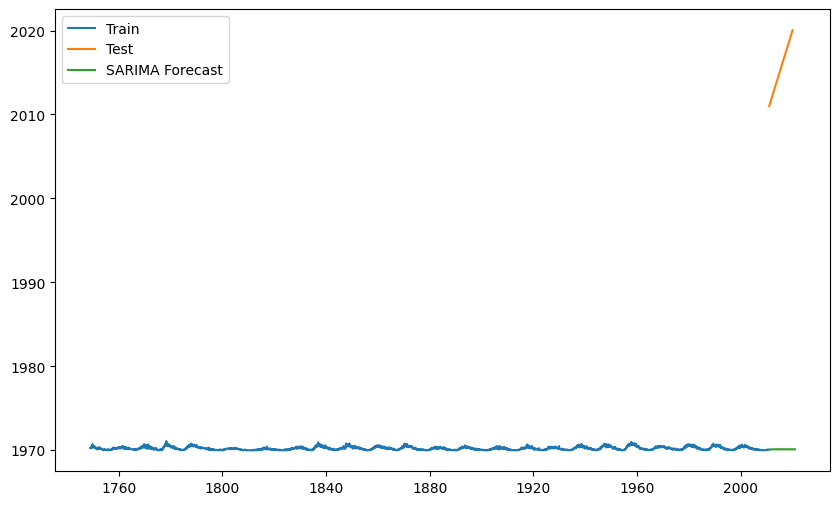

In [182]:
# SARIMA
# Determine p, d, q, P, D, Q, s using ACF, PACF and seasonal analysis
model_sarima1 = SARIMAX(train['Avg_sunspot_count'], order=(1, 0, 1), seasonal_order=(0, 0, 0, 0))
fit_sarima = model_sarima.fit()
forecast_sarima = fit_sarima.forecast(steps=len(test))

plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


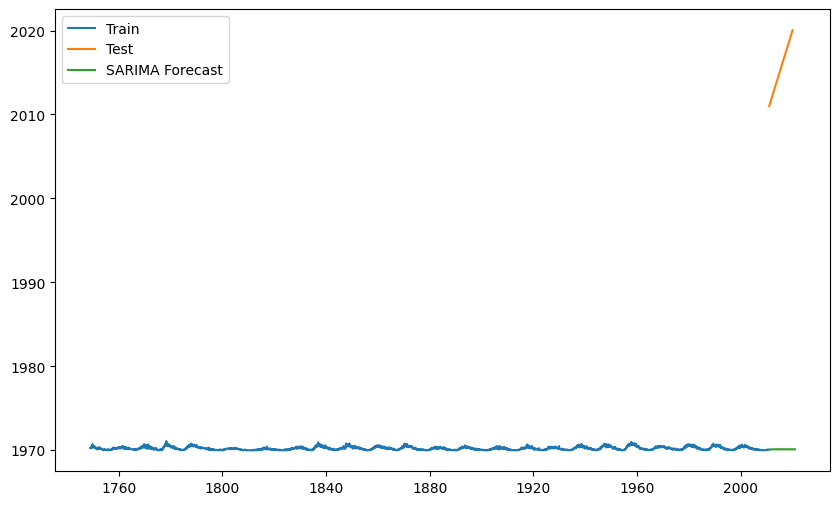

In [183]:
# ARIMA
# Determine p, d, q, P, D, Q, s using ACF, PACF and seasonal analysis
model_arima1 = ARIMA(train['Avg_sunspot_count'], order=(3, 0, 2), seasonal_order=(0, 0, 0, 0))
fit_sarima = model_sarima.fit()
forecast_arima = fit_sarima.forecast(steps=len(test))

plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.show()


In [190]:
test['Month'] = test['Month'].astype('str')
test['Month'] = test['Month'].apply(lambda x: '-'.join(x.split('-')[::-1]))

In [192]:
test.set_index(test['Month'], inplace = True)

In [193]:
# Assuming SARIMA performs the best
forecast_best = forecast_sarima

# Prepare submission
submission = pd.DataFrame({'Month': test.index, 'Avg_sunspot_count': forecast_best}, index = None)
submission.head()


,Month,Avg_sunspot_count
2011-01-01,01-01-2011,25.394482
2011-02-01,02-01-2011,31.099753
2011-03-01,03-01-2011,30.974754
2011-04-01,04-01-2011,32.659420
2011-05-01,05-01-2011,35.613826


In [194]:
submission.to_csv('sunspot_forecast_submission.csv', index=False)